<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Практический анализ данных и машинное обучение"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: преподаватель Факультета Компьютерных Наук НИУ ВШЭ <br> Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Занятие 7. Задача Обучение без учителя
## <center>Часть 4. Задача поиска аномалий в данных

Задача заключается в том, чтобы определить: является ли данный объект членом некоторого класса (который определяется обучающей выборкой) или нет. Таким образом, мы имеем задачу "одноклассовой" классификации, поскольку данных об аномалиях у нас нет (если бы они были, можно было бы решать задачу бинарной классификации - выброс\не выброс). Примером такой задачи является детектирование различных сбоев в работе сложных систем: обучающая выборка состоит из данных, описывающих нормальную работу такой системы, а целью является определение ситуаций, в которых что-то работает не так. Если бы мы могли симулировать неправильную работу систему, то можно было бы решать задачу бинарной классификации. Другой пример: мы хотим определять - есть ли на фотографии человек? Мы можем собрать очень большую обучающую выборку, содержащую фотографии людей. Однако какие фотографии следует поместить в выборку "не людей"?

Общая схема таких алгоритмов такова: по обучающей выборке (содержащей только обычные данные), алгоритм строит модель, описывающую её. Если вновь пришедший объект слишком отличается от этой модели по какой-либо метрике, тогда он считается выбросом.

### One-class SVM

Как и обычный двухклассовый SVM, данный метод сводится к решению задачи квадратичной оптимизации. Отличие заключается в том, что
обычный SVM строит разделяющую гиперплоскость, отделяющую один класс от другого, а одноклассовый SVM ищет гиперплоскость, отделяющую все объекты заданного нам класса от начала координат (после некоторого преобразования признаков) и имеющую, при этом наибольший отступ, что также эквивалентно поиску наименьшей сферы, содержащей объекты нужного нам класса. Таким образом, это двухклассовый SVM, где единственным объектом второго класса является начало координат.
<center>
    <img src="../../img/one_class_svm.jpg">
</center>

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
%pylab inline
figsize(12,8)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.datasets import load_boston

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Get data
X1 = load_boston()['data'][:, [8, 10]]  # two clusters
X2 = load_boston()['data'][:, [5, 12]]  # "banana"-shaped

# Define "classifiers" to be used
classifiers = {
    "Empirical Covariance": EllipticEnvelope(support_fraction=1.,
                                             contamination=0.261),
    "Robust Covariance (Minimum Covariance Determinant)":
    EllipticEnvelope(contamination=0.261),
    "OCSVM": OneClassSVM(nu=0.261, gamma=0.05)}

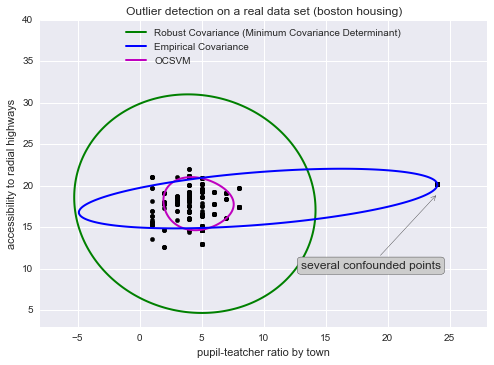

In [3]:
colors = ['m', 'g', 'b']
legend1 = {}
legend2 = {}

# Learn a frontier for outlier detection with several classifiers
xx1, yy1 = np.meshgrid(np.linspace(-8, 28, 500), np.linspace(3, 40, 500))
xx2, yy2 = np.meshgrid(np.linspace(3, 10, 500), np.linspace(-5, 45, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i])

legend1_values_list = list( legend1.values() )
legend1_keys_list = list( legend1.keys() )

# Plot the results (= shape of the data points cloud)
plt.title("Outlier detection on a real data set (boston housing)")
plt.scatter(X1[:, 0], X1[:, 1], color='black')
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
plt.annotate("several confounded points", xy=(24, 19),
             xycoords="data", textcoords="data",
             xytext=(13, 10), bbox=bbox_args, arrowprops=arrow_args)
plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend((legend1_values_list[0].collections[0],
            legend1_values_list[1].collections[0],
            legend1_values_list[2].collections[0]),
           (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2]),
           loc="upper center")
plt.ylabel("accessibility to radial highways")
plt.xlabel("pupil-teatcher ratio by town")

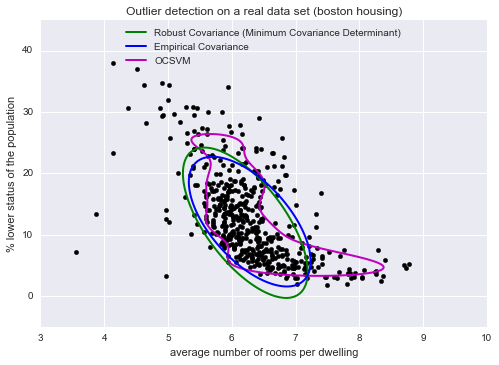

In [4]:
for i, (clf_name, clf) in enumerate(classifiers.items()):

    clf.fit(X2)
    Z2 = clf.decision_function(np.c_[xx2.ravel(), yy2.ravel()])
    Z2 = Z2.reshape(xx2.shape)
    legend2[clf_name] = plt.contour(
        xx2, yy2, Z2, levels=[0], linewidths=2, colors=colors[i])

legend2_values_list = list( legend2.values() )
legend2_keys_list = list( legend2.keys() )

plt.title("Outlier detection on a real data set (boston housing)")
plt.scatter(X2[:, 0], X2[:, 1], color='black')
plt.xlim((xx2.min(), xx2.max()))
plt.ylim((yy2.min(), yy2.max()))
plt.legend((legend2_values_list[0].collections[0],
            legend2_values_list[1].collections[0],
            legend2_values_list[2].collections[0]),
           (legend2_keys_list[0], legend2_keys_list[1], legend2_keys_list[2]),
           loc="upper center")
plt.ylabel("% lower status of the population")
plt.xlabel("average number of rooms per dwelling")

plt.show()

## Полезные ссылки
- [One-class SVM](http://rvlasveld.github.io/blog/2013/07/12/introduction-to-one-class-support-vector-machines/)